# Example script for use of LocalizeSL with Rasmussen et al. (2018) projections

*Last updated by Robert Kopp, robert-dot-kopp-at-rutgers-dot-edu, 2018-04-01 19:57:04 -0400*

This notebook illustrates the use of the projections in

	D. J. Rasmussen, K. Bittermann, M. K. Buchanan, S. Kulp, B. H. Strauss, R. E. 
	Kopp, and M. Oppenheimer (2018). Extreme sea level implications of 
	1.5°C, 2.0 °C, and 2.5 °C temperature stabilization targets in the 21st and 
	22nd centuries. _Environmental Research Letters_ 13, 034040. doi: 
	10.1088/1748-9326/aaac87.

In [1]:
selectedSite = 12; % use PSMSL ID here to select site

In [7]:
quantlevs=[.01 .05 .167 .5 .833 .95 .99 .995 .999]; % identify quantiles we will pull

## Workspace setup

In [2]:
% set up path

rootdir='~/Dropbox/Code/LocalizeSL';
corefile=load(fullfile(rootdir,'IFILES/SLRProjections180124GRIDDEDcore_Tscens.mat'));
addpath(fullfile(rootdir,'MFILES'));


In [3]:
% specify scenario labels and scenarios to use
% important since we differ from defaults here

scenlabs={'tmp15','tmp20','tmp25'};
selscens=[1 2 3];

## GMSL projections

In [8]:
% pull GSL samples
[sampsGSLrise,sampsGSLcomponents,GSLsiteids,GSLsitenames,GSLtargyears,GSLscens,GSLcols] = LocalizeStoredProjections(0,corefile,selscens);

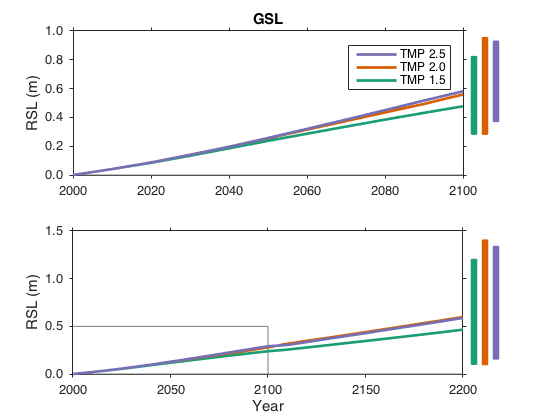

In [29]:
% plot curves

figure;
[hp1,ha1]=PlotSLRProjection(sampsGSLrise,targyears,[],scenlabs,selscens);
axes(ha1(1));
title(GSLsitenames{1});

In [30]:
WriteTableDecomposition(sampsGSLcomponents,quantlevs,GSLsiteids,GSLsitenames,GSLtargyears,GSLcols,GSLscens);

## Local projections

In [11]:
% generate local samples

[sampslocrise,sampsloccomponents,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile,selscens);

Region 12 (NEW YORK)- median in 1p5degree 2100 of 546.94 mm
Region 12 (NEW YORK)- median in 2p0degree 2100 of 692.63 mm
Region 12 (NEW YORK)- median in 2p5degree 2100 of 729.26 mm


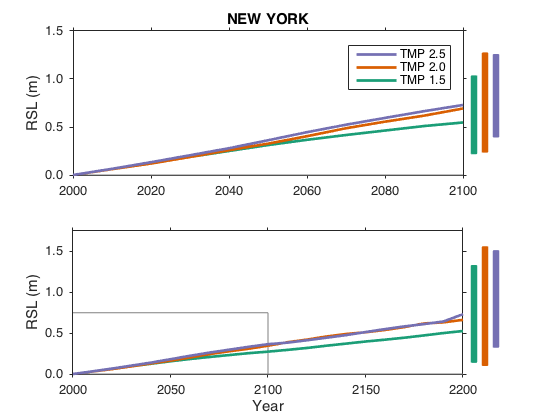

In [31]:
% plot curves

figure;
[hp1,ha1]=PlotSLRProjection(sampslocrise,targyears,[],scenlabs,selscens);
axes(ha1(1));
title(sitenames{1});


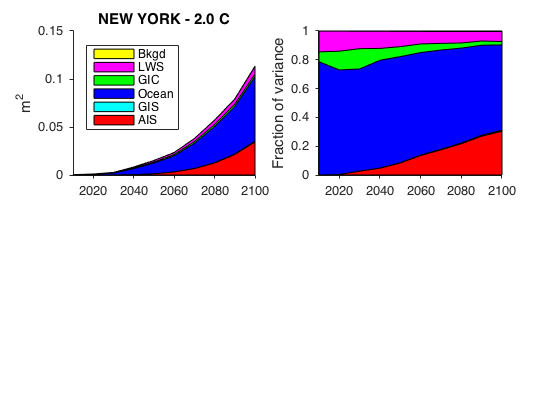

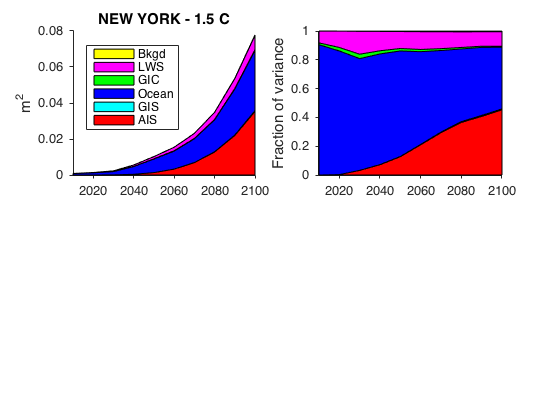

In [19]:
% plot variance decomposition

figure;
hp2=PlotSLRProjectionVariance(sampsloccomponents,targyears,cols,[],1,1);
subplot(2,2,1); title([ sitenames{1} ' - 1.5 C']);

figure;
hp3=PlotSLRProjectionVariance(sampsloccomponents,targyears,cols,[],1,2);
subplot(2,2,1); title([sitenames{1} ' - 2.0 C']);


In [20]:
% output quantiles of projections

quantlevs=[.01 .05 .167 .5 .833 .95 .99 .995 .999];
WriteTableSLRProjection(sampslocrise,quantlevs,siteids,sitenames,targyears,scens);


In [21]:
% output timing of height exceedances
WriteTableSLRHeightExceedanceTiming(sampslocrise,[],siteids,sitenames,targyears,scens,1);


In [22]:
% output Monte Carlo samples
WriteTableMC(sampslocrise,[],siteids,sitenames,targyears,scens);


In [23]:
% output Monte Carlo samples without background trend,
% to allow incorporation of alternative estimates of background trend

WriteTableMC(sampsloccomponents,1:23,siteids,sitenames,targyears,scens,'LSLProj_nobkgd_');


In [24]:
% output decomposition
WriteTableDecomposition(sampsloccomponents,quantlevs,siteids,sitenames,targyears,cols,scens);
